In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import itertools

In [99]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,4
rcParams['figure.dpi'] = 300

In [6]:
from src import data,viz

In [7]:
import os

In [37]:
def format_x(ax):
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_tick_params(rotation=45)

In [8]:
# The conversion to `pd.Categorical` fails spectacularly, so we will do without it.
df_cosmo_de = pd.read_spss(f"{data.data_root}/external/COSMO/INSERM.sav", convert_categoricals=False) 

cosmo_de_dates = [
    '2020-03-04',
    '2020-03-11',
    '2020-03-18',
    '2020-03-25',
    '2020-04-01',
    '2020-04-08',
    '2020-04-15',
    '2020-04-22',
    '2020-04-29',
]
df_aff = df_cosmo_de.filter(regex='TIME|^AFF_',axis=1).dropna(axis=1)
df_aff['TIME'] = pd.to_datetime(
    df_aff.replace(
        {'TIME':dict(zip(range(1,len(cosmo_de_dates)+1),cosmo_de_dates))}
    )['TIME']
).astype('datetime64[D]')
df_aff = df_aff.groupby('TIME').mean()

In [9]:
import scipy.io as sio
import datetime

In [10]:
dkmat = sio.loadmat(f"{data.data_root}/external/COSMO_dk/COSMO_DK_crossSectional.mat")
colnames = [name[0] for name in dkmat["COSMO_DK_varnames"].squeeze()]
cosmo_dk_dates = [
    '2020-03-25',
    '2020-04-01',
    '2020-04-08',
    '2020-04-15',
    '2020-04-22',
    '2020-04-29',
    '2020-05-06',
    '2020-05-13',
]
df_cosmo_dk = pd.DataFrame(data=dkmat["COSMO_DK"], columns=colnames)
df_aff_dk = df_cosmo_dk.filter(regex='wave|^AFF_',axis=1)

df_aff_dk['wave'] = pd.to_datetime(
    df_aff_dk.replace(
        {'wave':dict(zip(range(13,len(cosmo_dk_dates)+13),cosmo_dk_dates))}
    )['wave']
).astype('datetime64[D]')
df_aff_dk = df_aff_dk.groupby('wave').mean()

/home/izaak/local_repos/glyptodon/CovidH_TNG/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
start_date=datetime.date(2020, 2, 15)
country='germany'

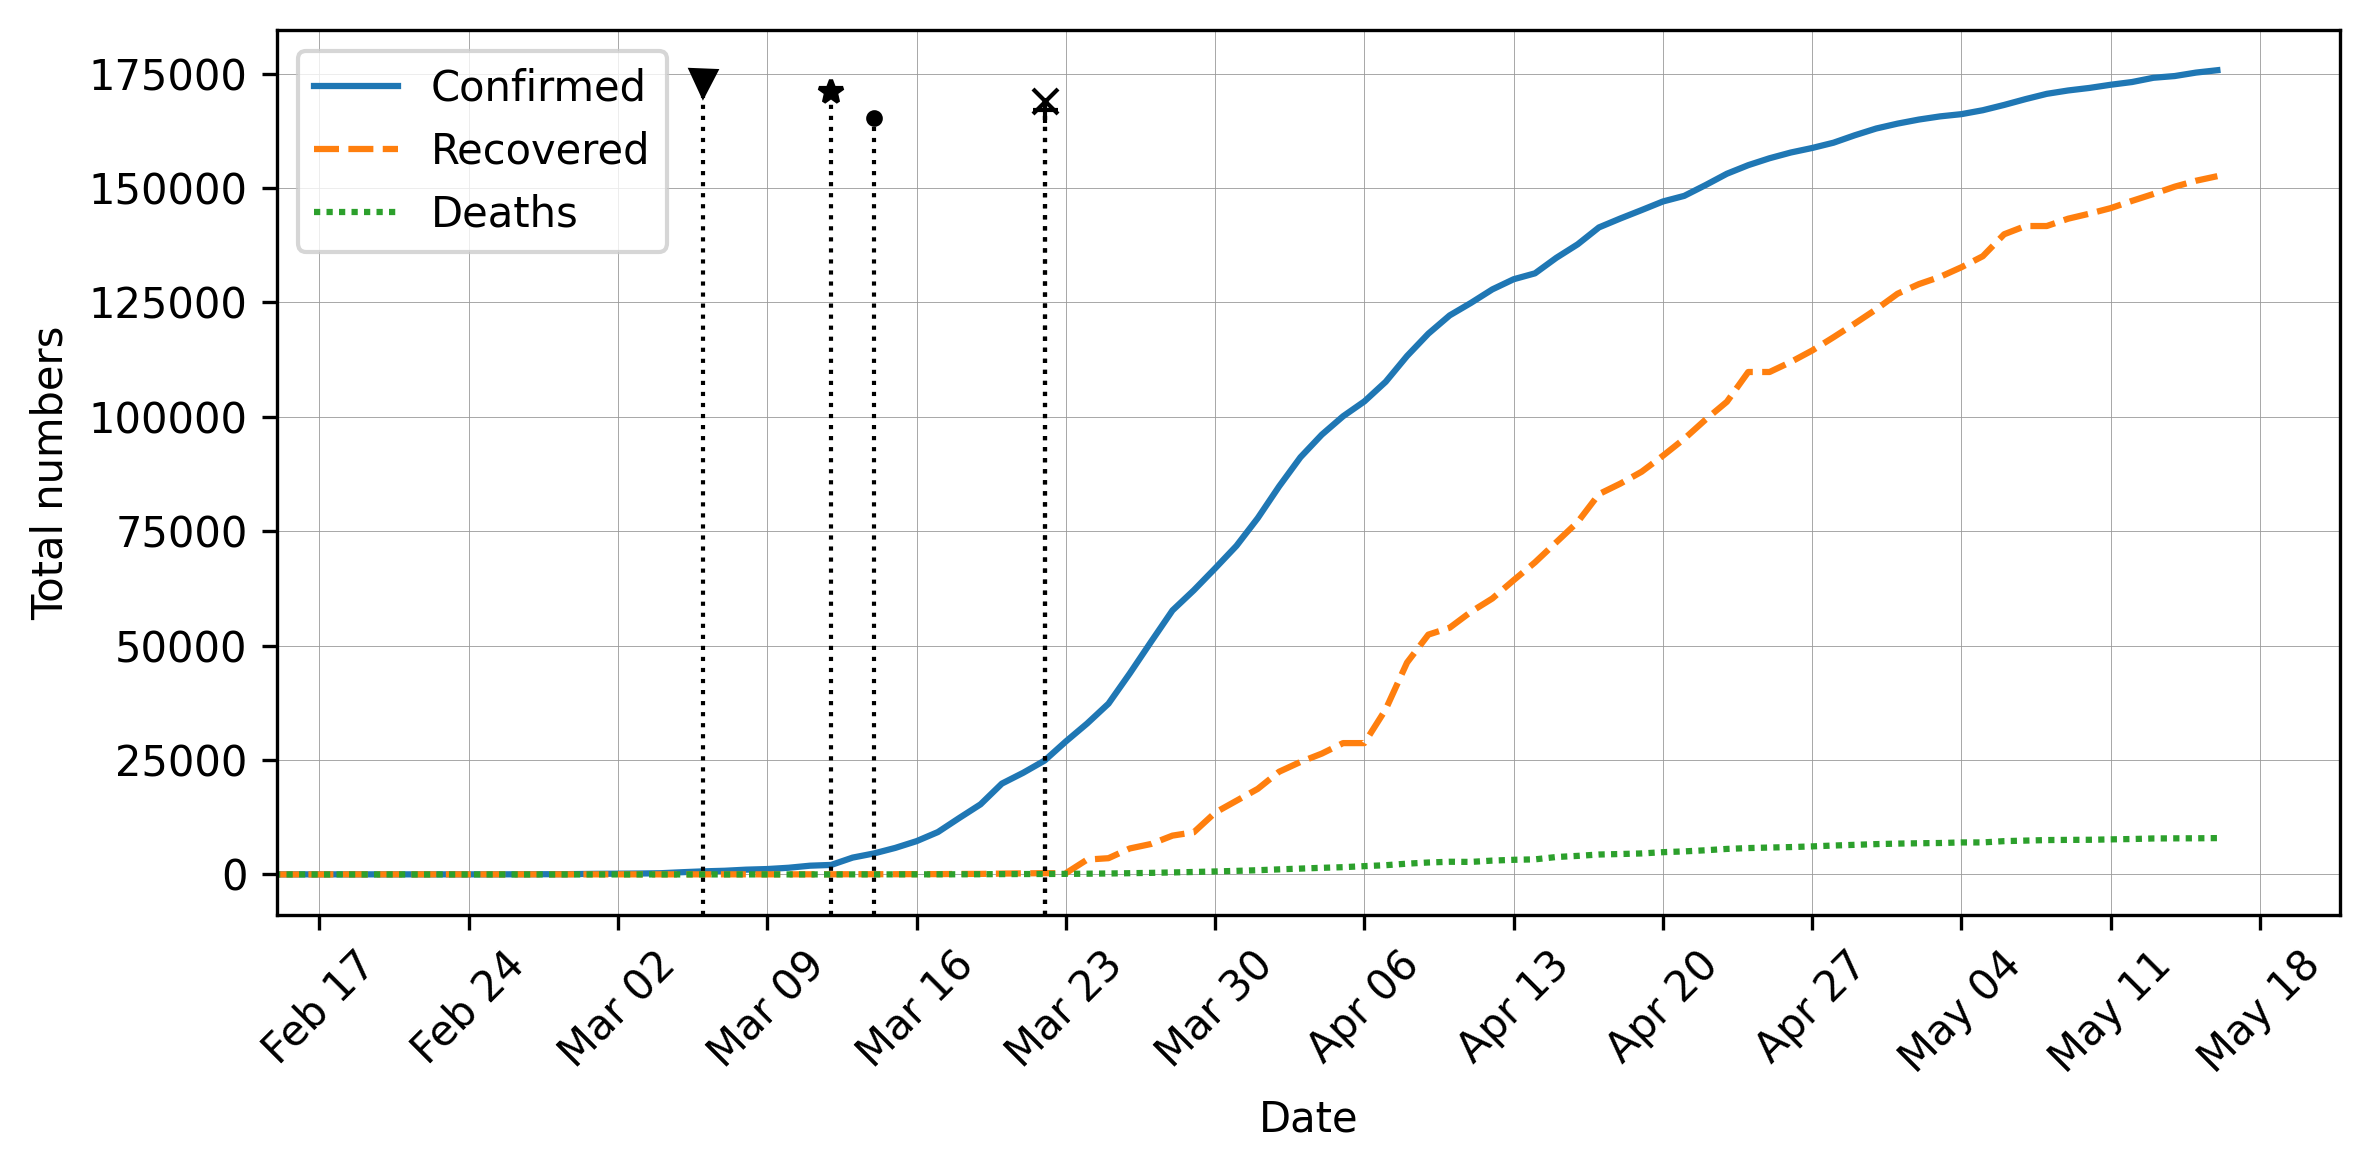

In [100]:
fig, ax = plt.subplots()
df = data.load_covid19(country)
sns.lineplot(
    data=df,
    ax=ax
)
ax.set_ylabel('Total numbers')
ax.grid(color='#999999', linewidth=0.2)
ax.set_xlim(left=start_date)
viz.format_xaxis_dates(ax)
viz.annotate_interventions(ax,country,legend=False)
fig.tight_layout()

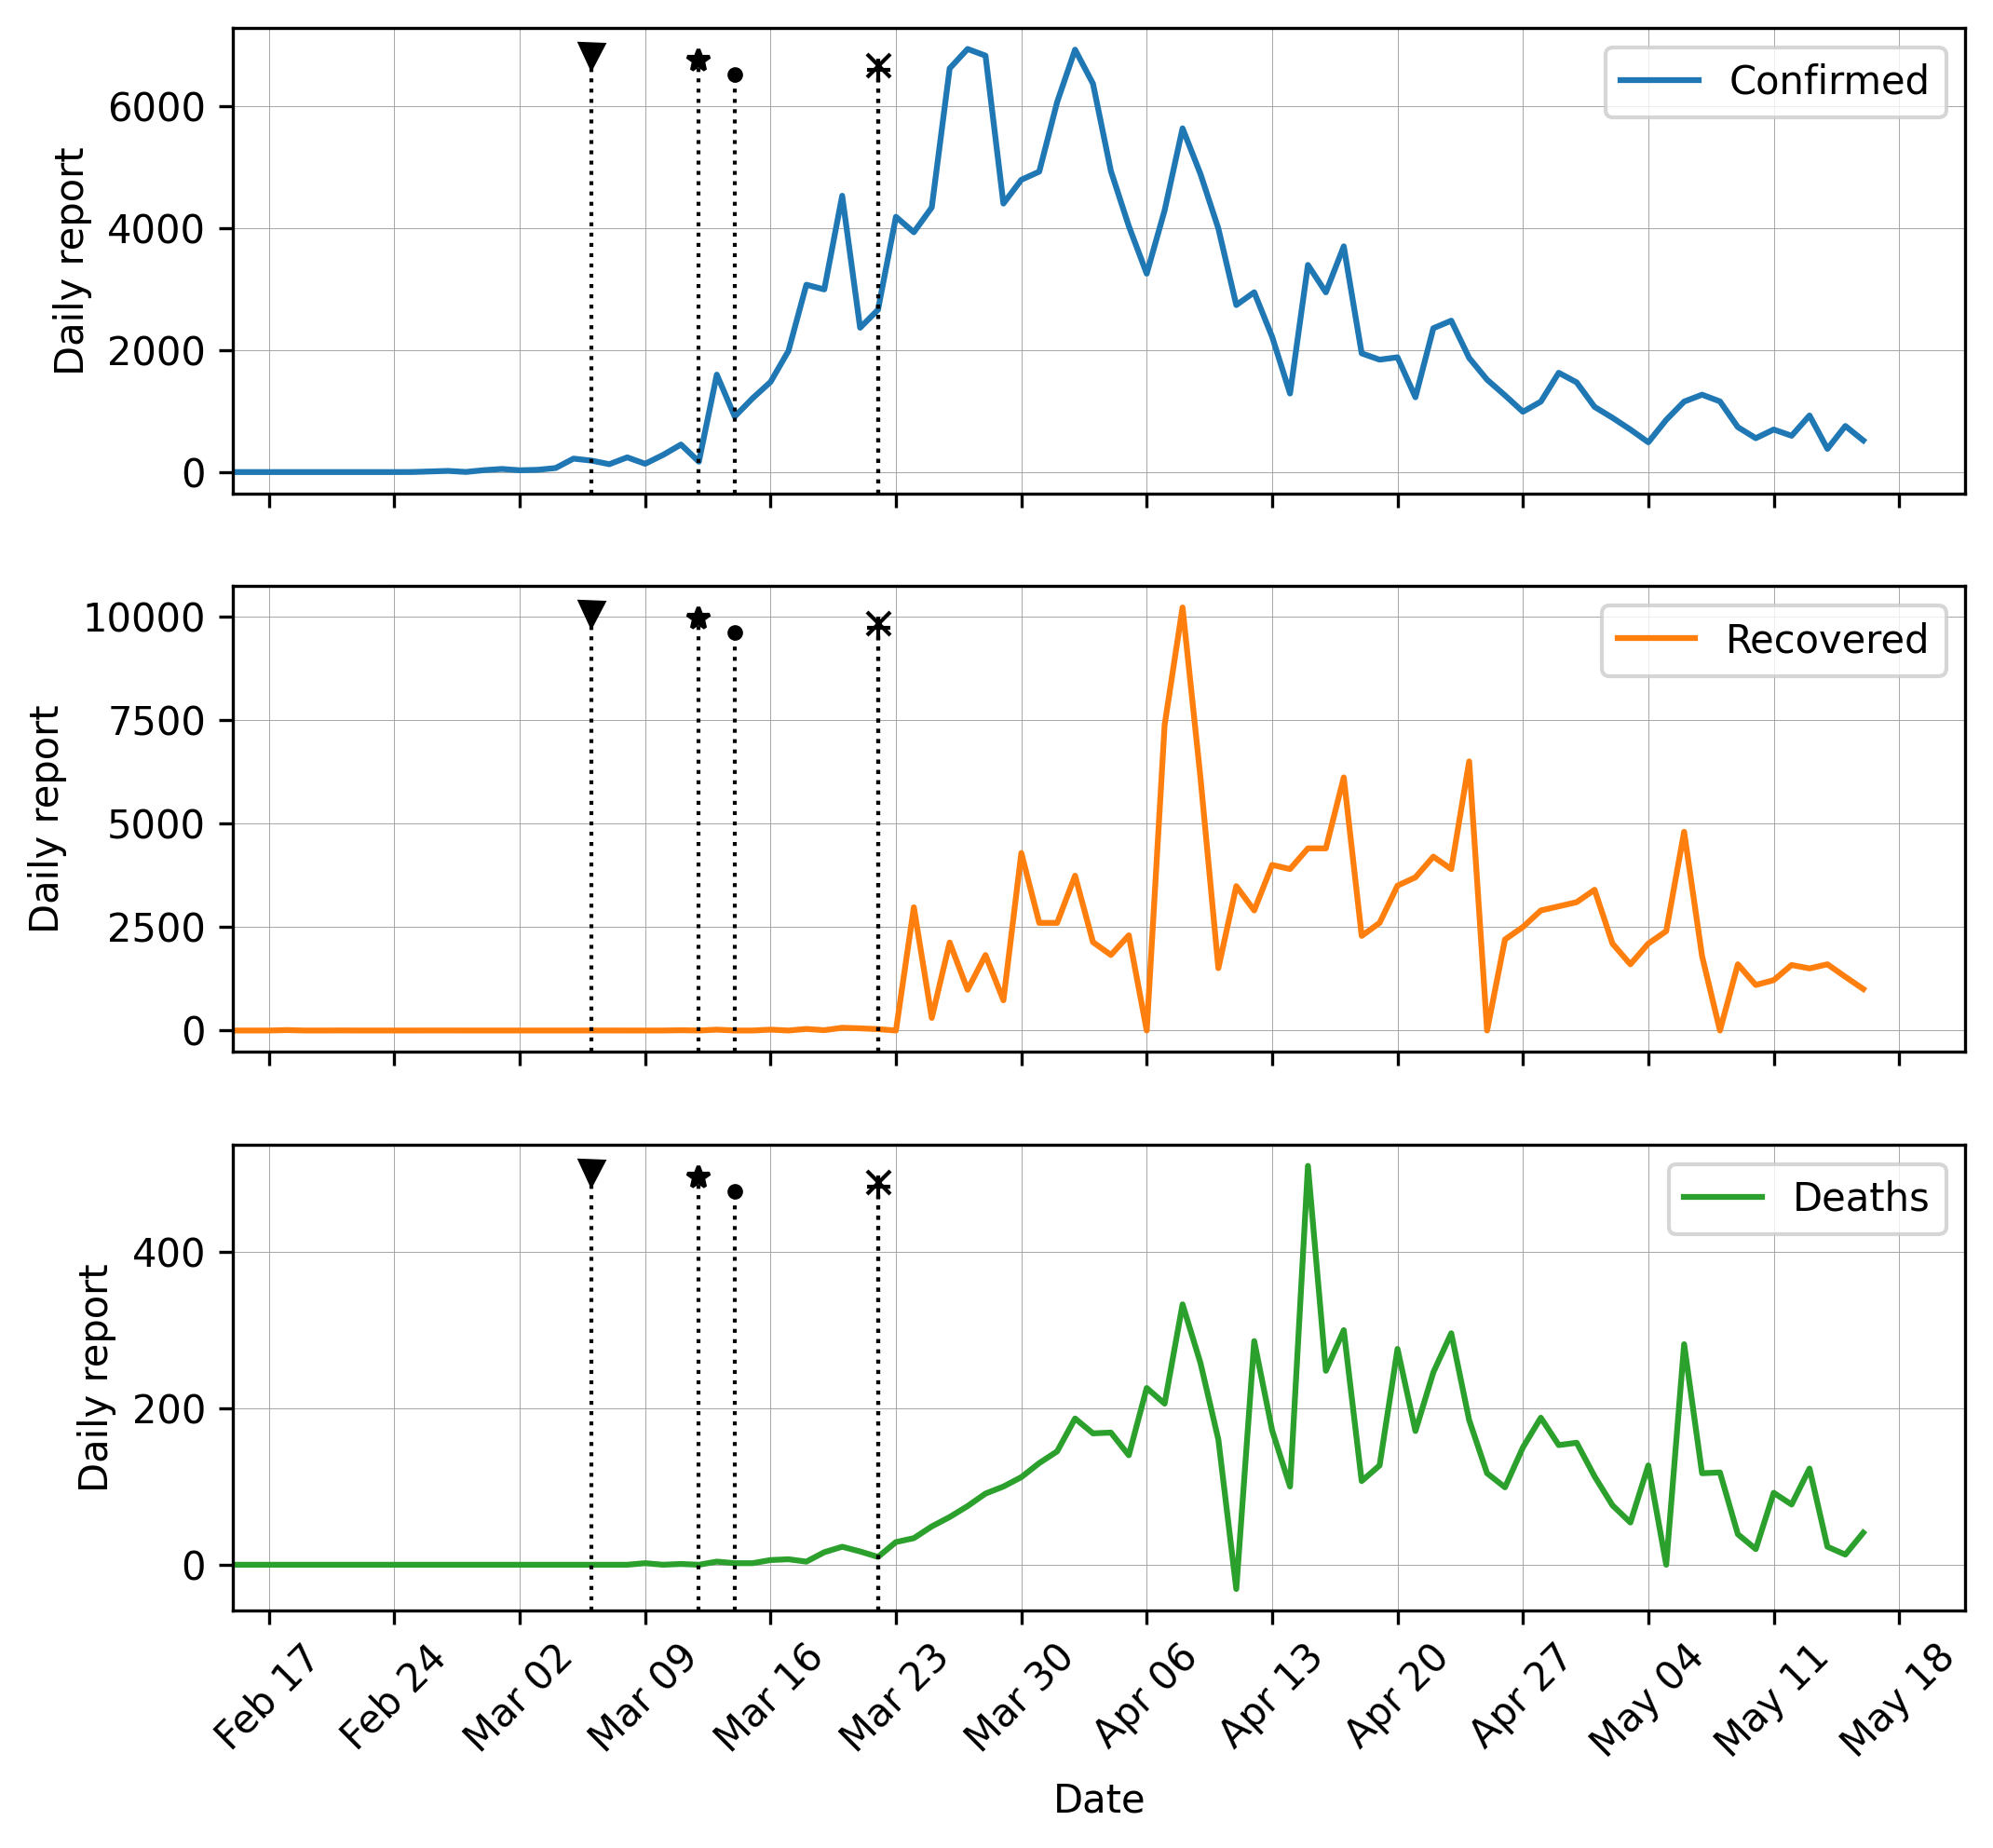

In [101]:
df = data.load_covid19(country)
palette = itertools.cycle(sns.color_palette())

nrows=len(df.columns)
fig, axs = plt.subplots(nrows=nrows, figsize=(8,2.5*nrows), sharex=True)
for i,(ax, col) in enumerate(zip(axs,df.columns)):
    sns.lineplot(
        data=df[[col]].diff(),
        palette=[next(palette)],
        ax=ax
    )
    ax.set_ylabel('Daily report')
    ax.grid(color='#999999', linewidth=0.2)
    ax.set_xlim(left=start_date)
    viz.annotate_interventions(ax,country,legend=False)
viz.format_xaxis_dates(ax,)


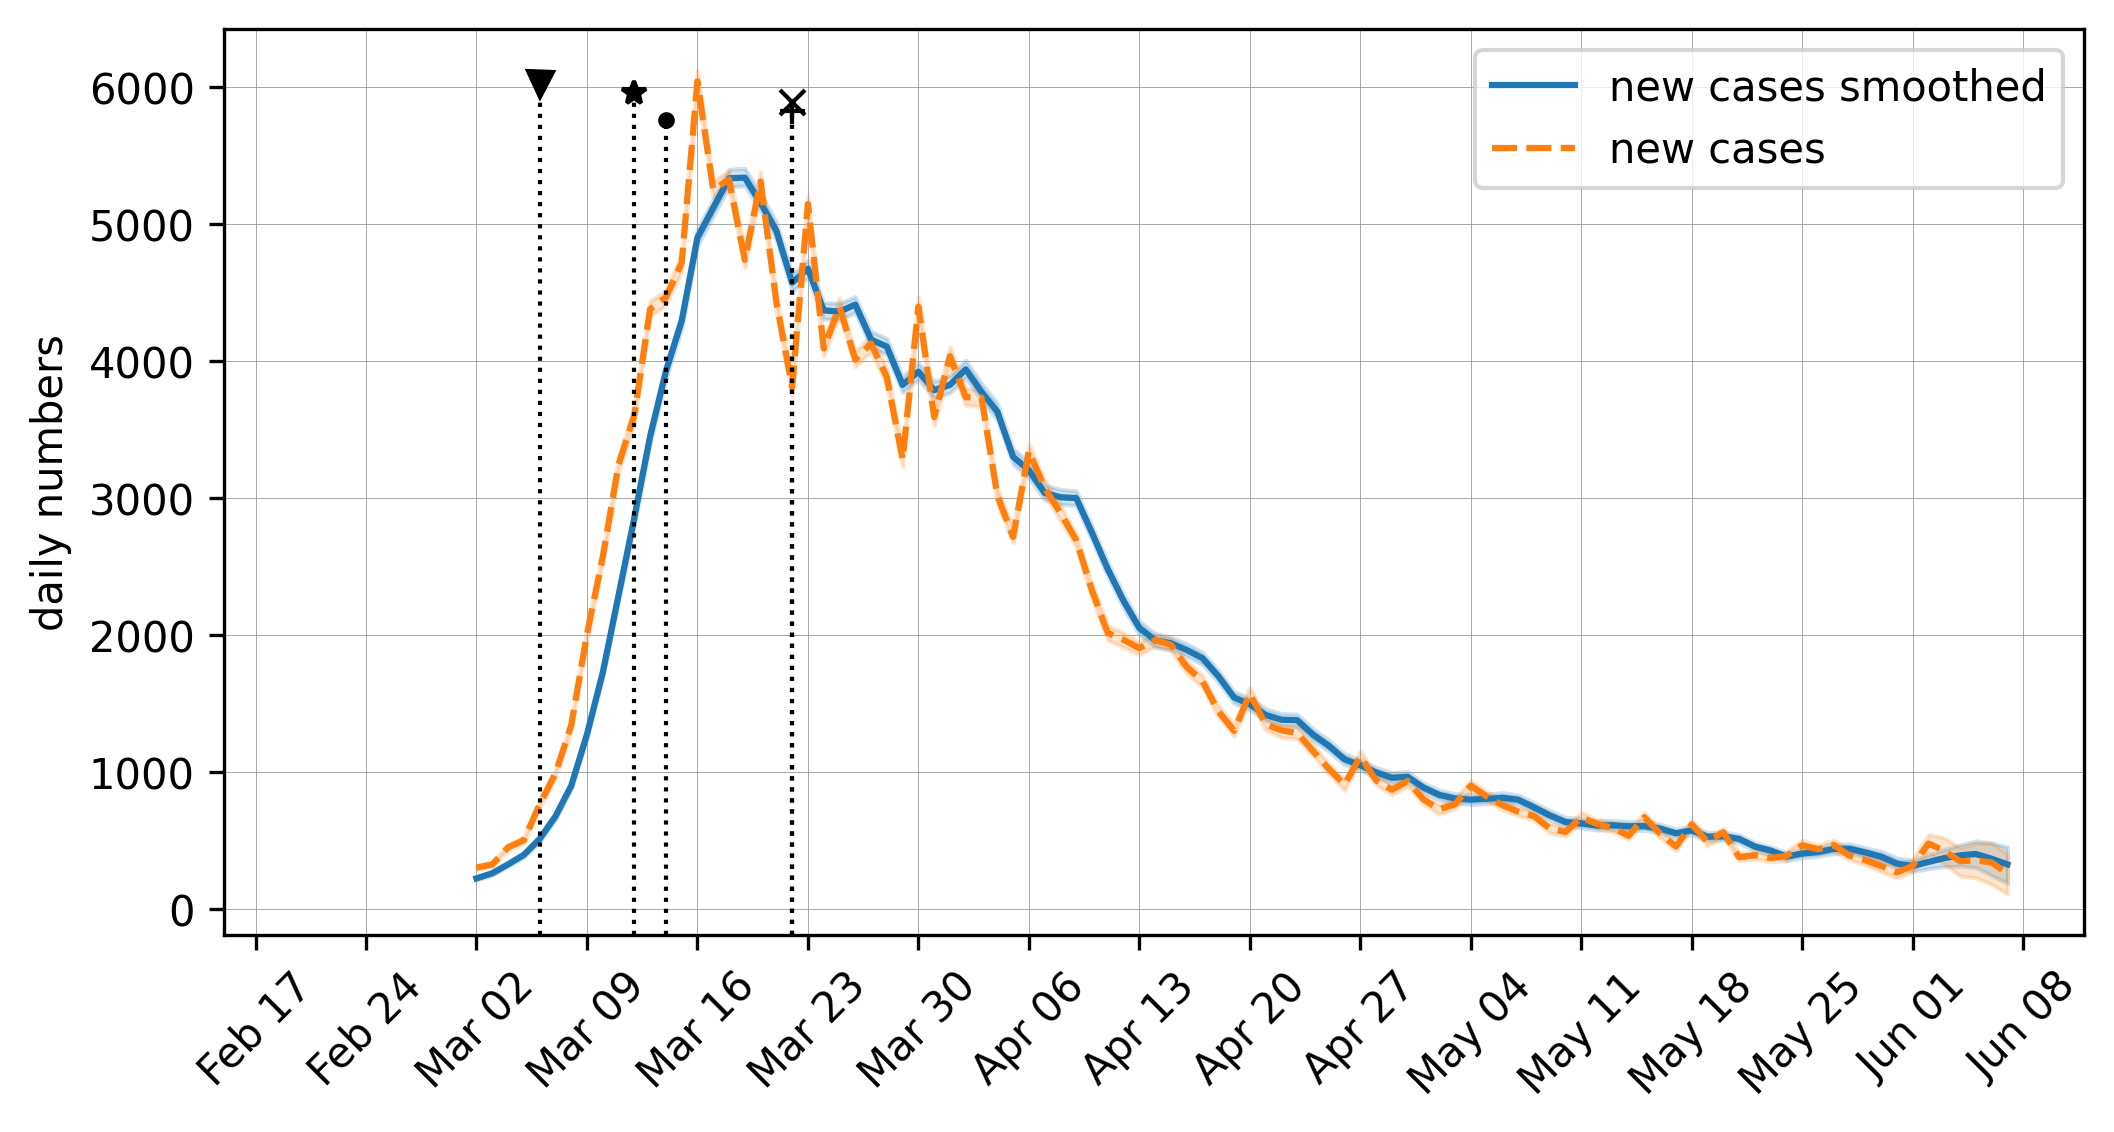

In [102]:
fig, ax = plt.subplots()
df = data.load_rki_nowcasting()

sns.lineplot(
    data=df[['number_of_new_cases_point_estimate','number_of_new_cases_point_estimate_without_smoothing']].rename(
        axis='columns',
        mapper={
            'number_of_new_cases_point_estimate':'new cases smoothed',
            'number_of_new_cases_point_estimate_without_smoothing':'new cases',
        }

    ),
    ax=ax
)

ax.fill_between(
    df.index.values,
    df.number_of_new_cases_lower_CI_95, 
    df.number_of_new_cases_upper_CI_95,
    color=sns.color_palette()[0],
    alpha=0.2
)

ax.fill_between(
    df.index.values,
    df.number_of_new_cases_lower_CI_95_without_smoothing, 
    df.number_of_new_cases_upper_CI_95_without_smoothing,
    color=sns.color_palette()[1],
    alpha=0.2
)
ax.set_xlim(left=start_date)
ax.grid(color='#999999', linewidth=0.2)

viz.format_xaxis_dates(ax)
ax.set_xlabel('')
ax.set_ylabel('daily numbers')
viz.annotate_interventions(ax,country,legend=False)




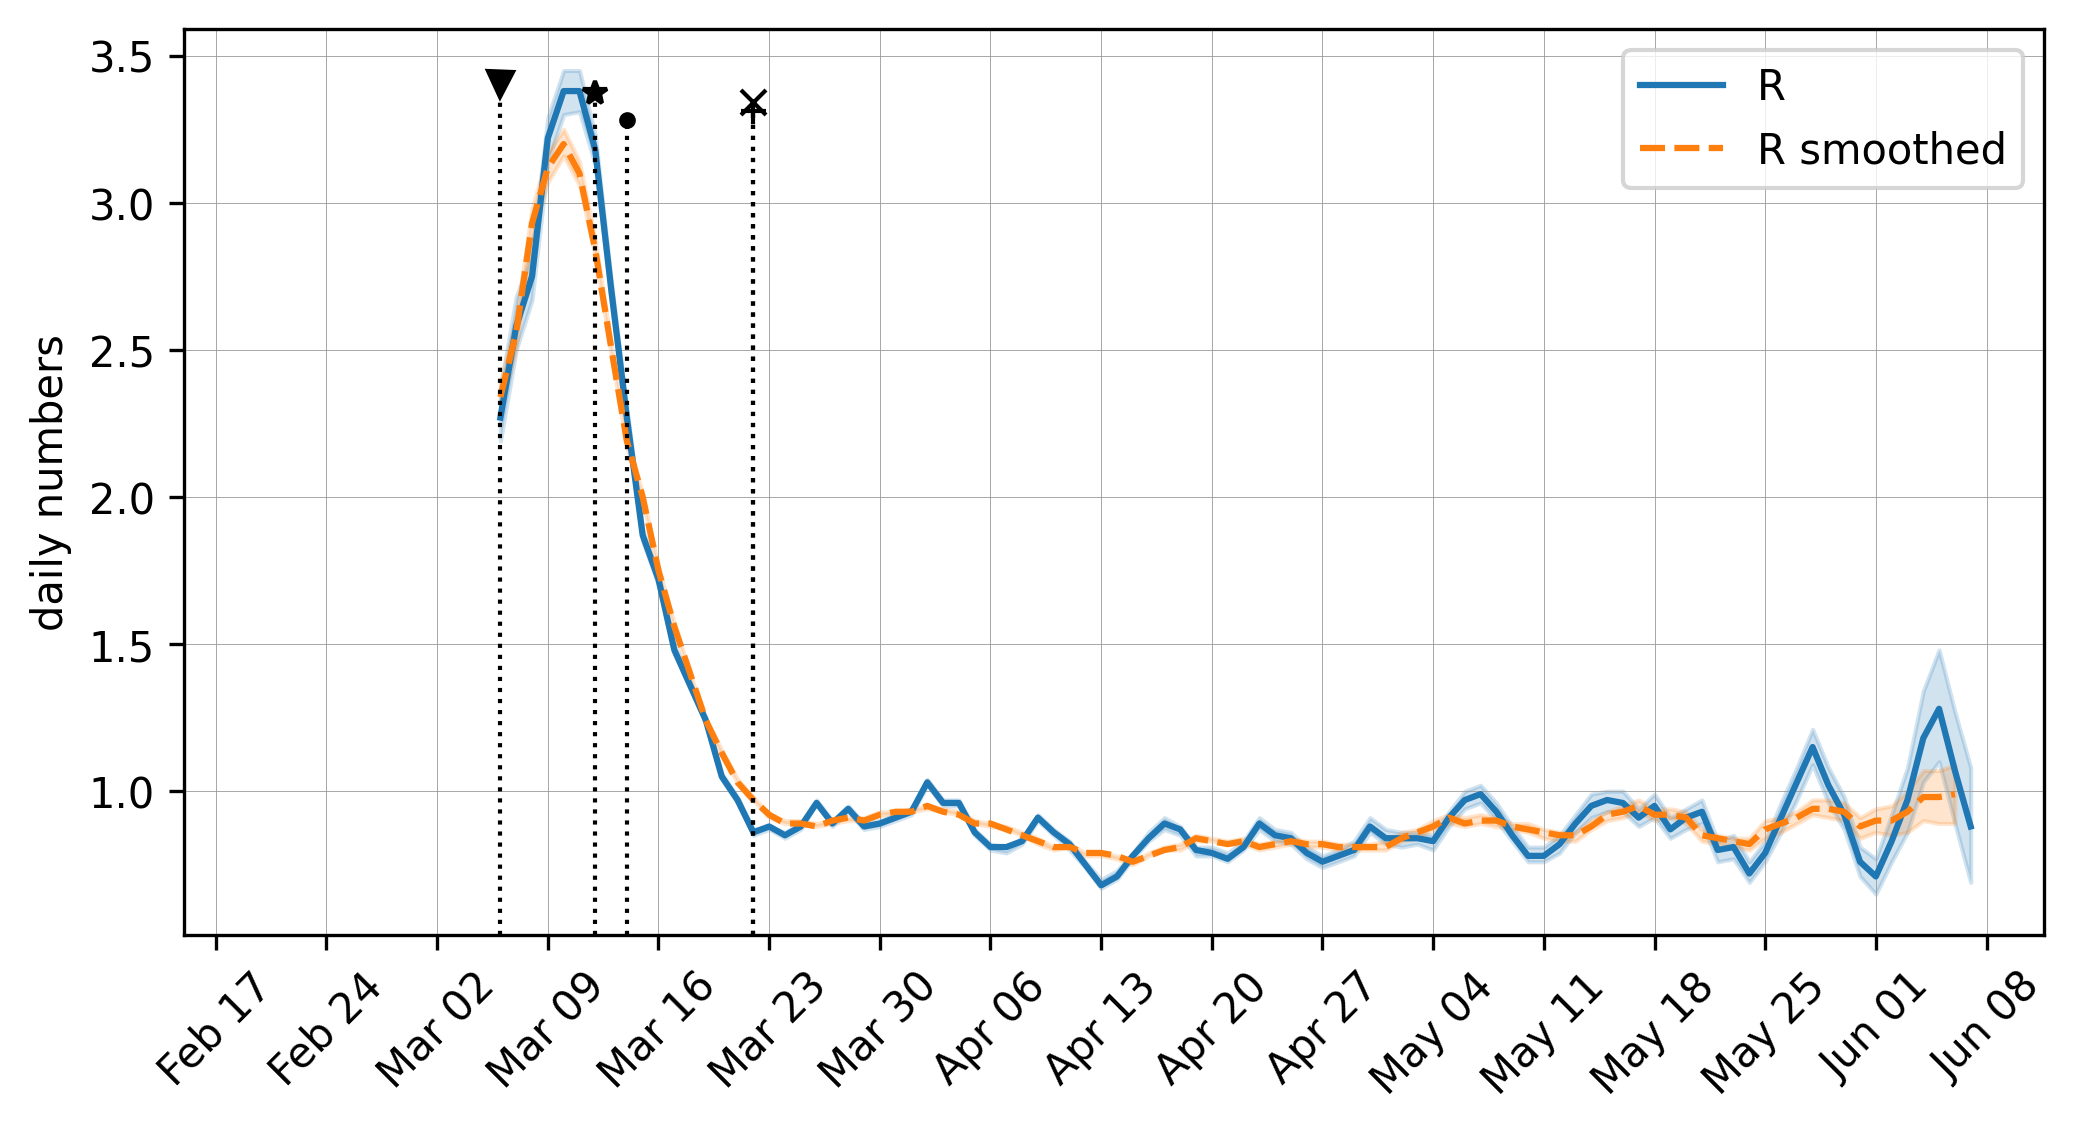

In [103]:
fig, ax = plt.subplots()
df = data.load_rki_nowcasting()

sns.lineplot(
    data=df[['reproduction_number_R_point_estimate','R_7_day_point_estimate']].rename(
        axis='columns',
        mapper={
            'reproduction_number_R_point_estimate':'R',
            'R_7_day_point_estimate':'R smoothed',
        }

    ),
    ax=ax
)
ax.fill_between(
    df.index.values,
    df.reproduction_number_R_lower_CI_95, 
    df.reproduction_number_R_upper_CI_95,
    color=sns.color_palette()[0],
    alpha=0.2
)

ax.fill_between(
    df.index.values,
    df.R_7_day_lower_CI_95,
    df.R_7_day_upper_CI_95,
    color=sns.color_palette()[1],
    alpha=0.2
)
ax.set_xlim(left=start_date)
ax.grid(color='#999999', linewidth=0.2)

viz.format_xaxis_dates(ax)
ax.set_xlabel('')
ax.set_ylabel('daily numbers')
viz.annotate_interventions(ax,country,legend=False)




Text(0.5, 0, '')

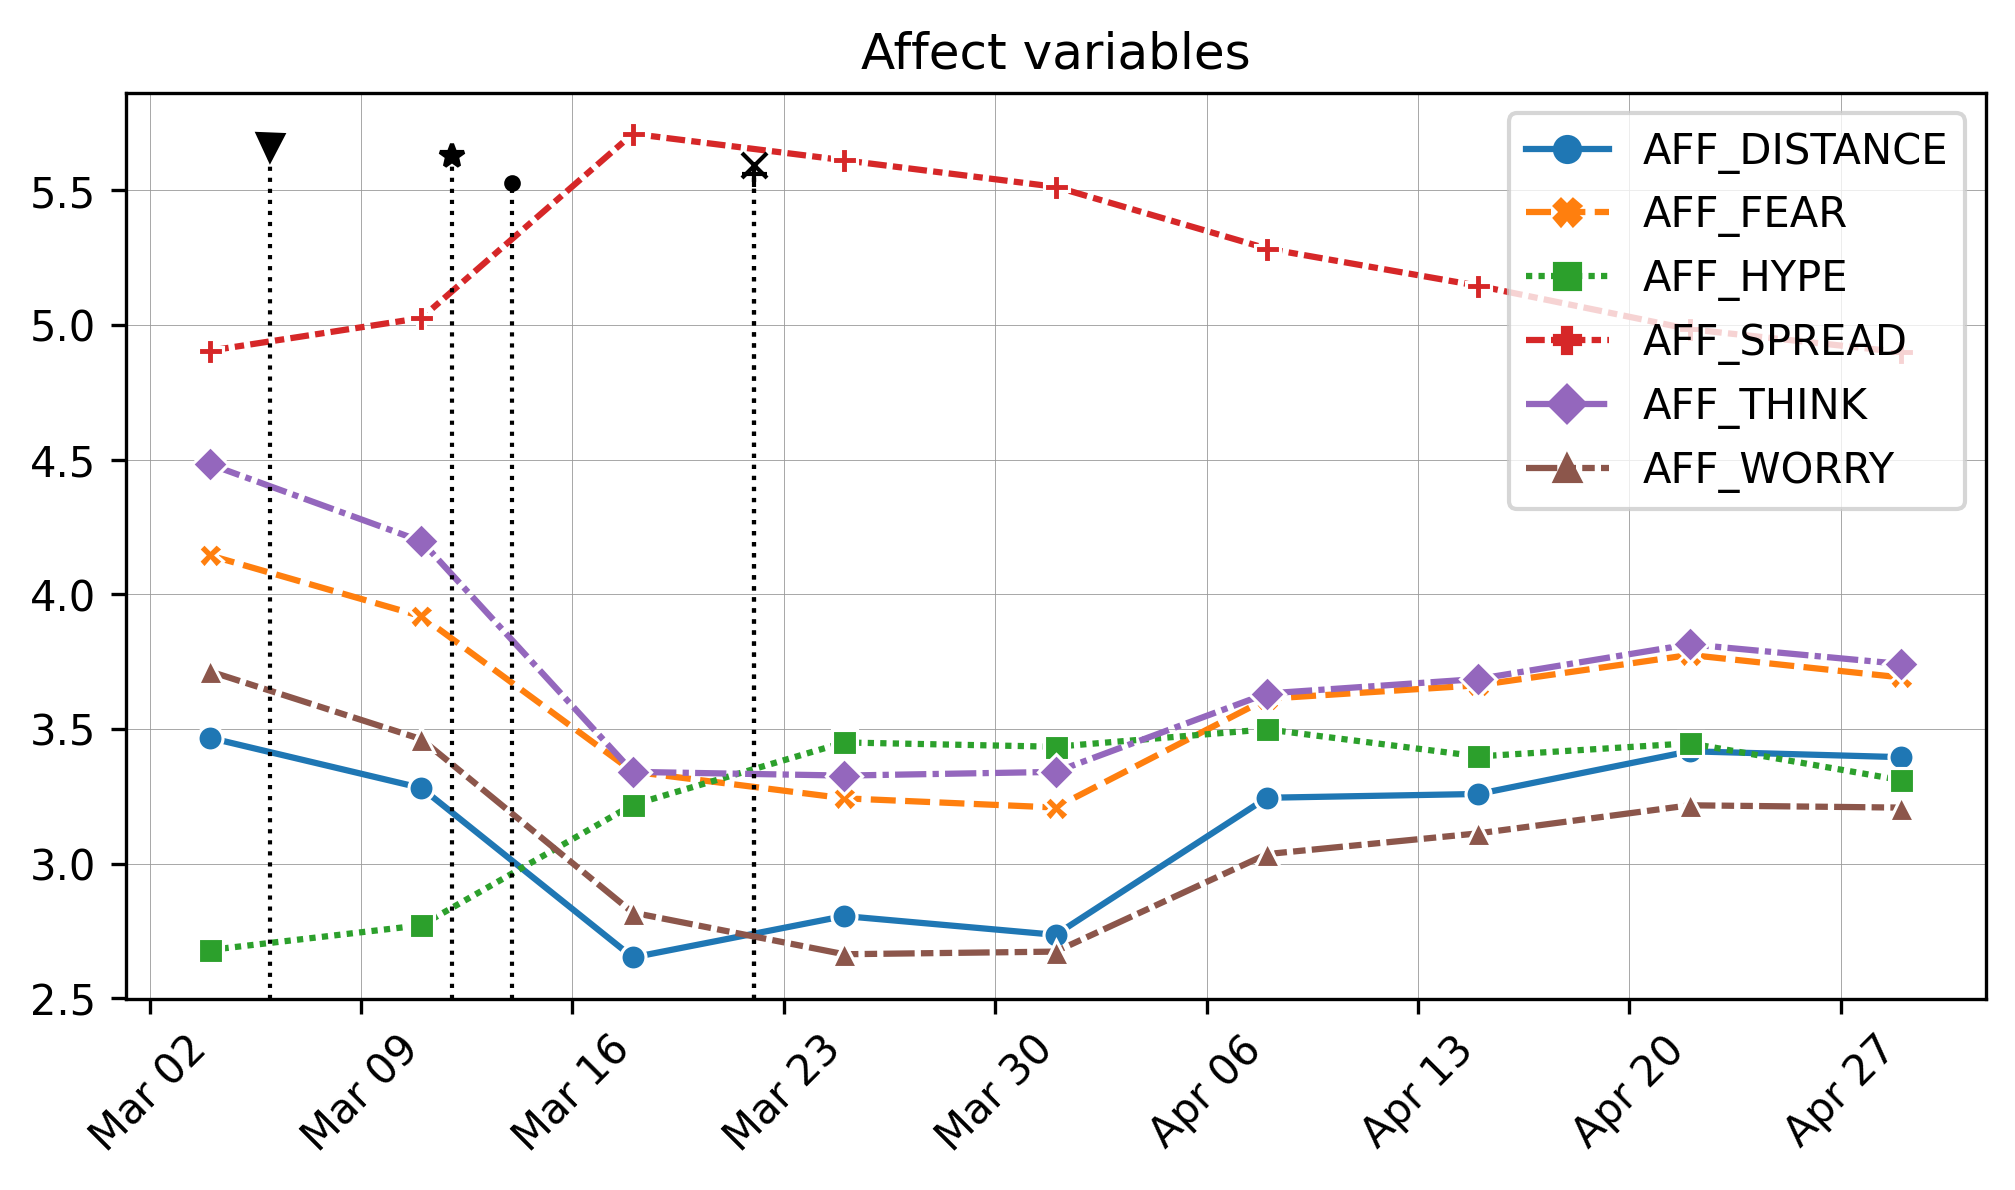

In [107]:
fig, ax = plt.subplots()
if country == 'germany':
    sns.lineplot(
        data=df_aff,markers=True,
        ax=ax
    )
if country == 'denmark':
    sns.lineplot(
        data=df_aff_dk,
        dashes=False,
        ax=ax
    )
ax.set_title('Affect variables')
ax.grid(color='#999999', linewidth=0.2)
viz.annotate_interventions(ax,country,legend=False)

viz.format_xaxis_dates(ax)
ax.set_xlabel('')

In [94]:
df_behav = pd.read_csv(
    os.path.join(data.data_root,'processed','germany_cosmo_behav.csv'),
    parse_dates=['date']
).set_index('date')
df_behav

,carry_mask,avoid_public_places,keep_distance,wash_hands,avoid_parties
date,,,,,
2020-03-03,8,NaN,NaN,NaN,NaN
2020-03-10,6,NaN,NaN,87.0,NaN
2020-03-17,8,NaN,NaN,95.0,NaN
2020-03-24,13,89.0,96.0,96.0,NaN
2020-03-31,26,89.0,97.0,94.0,95.0
2020-04-07,29,88.0,96.0,95.0,94.0
2020-04-14,24,82.0,91.0,88.0,88.0
2020-04-21,34,78.0,92.0,87.0,87.0
2020-04-28,60,78.0,91.0,86.0,90.0


Text(0.5, 0, '')

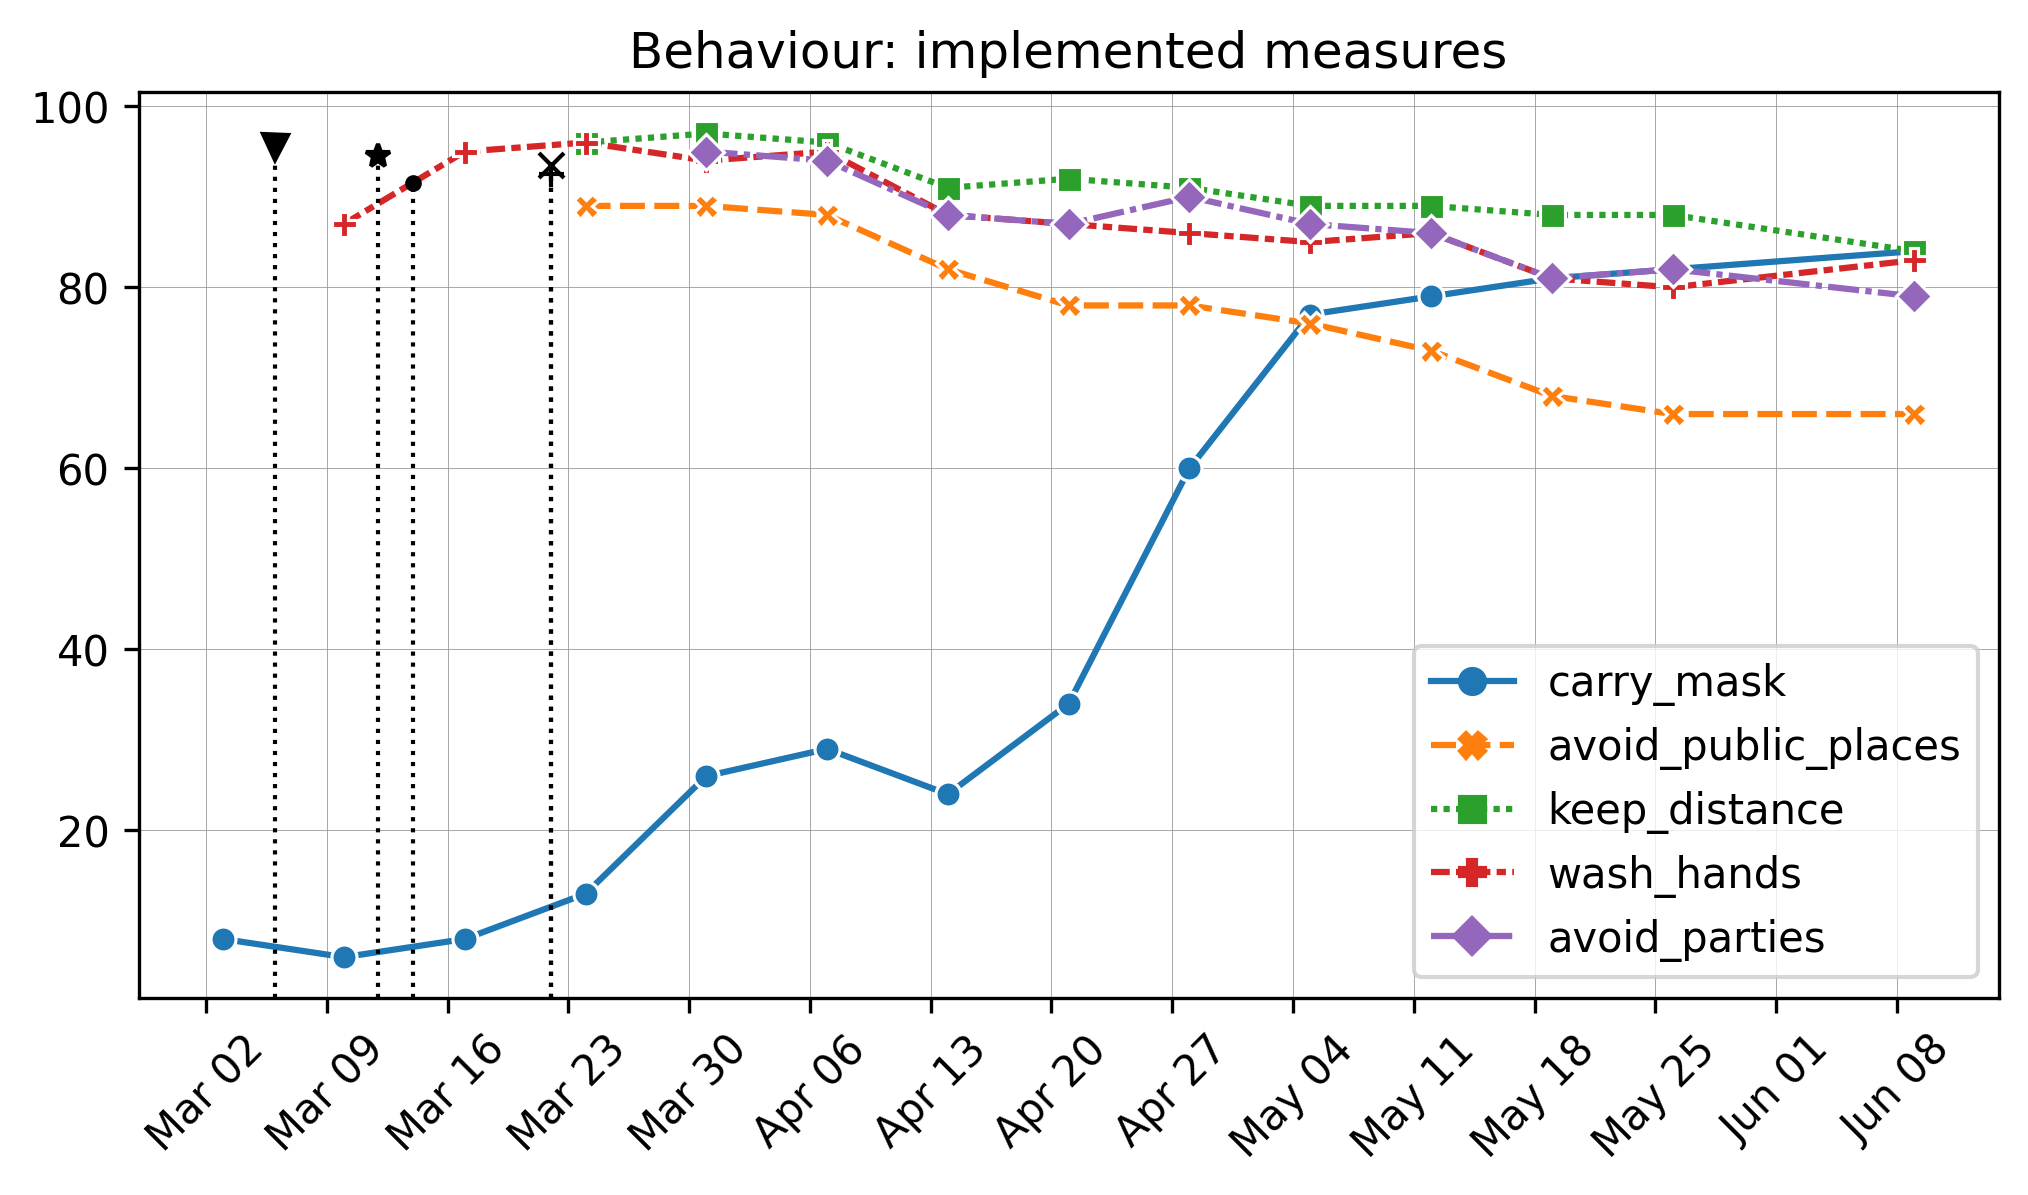

In [106]:
fig, ax = plt.subplots()
sns.lineplot(data=df_behav, markers=True, ax=ax)
ax.grid(color='#999999', linewidth=0.2)
viz.annotate_interventions(ax,country,legend=False)

viz.format_xaxis_dates(ax)
ax.set_title('Behaviour: implemented measures')
ax.set_xlabel('')

(737470.0, 737558.2)

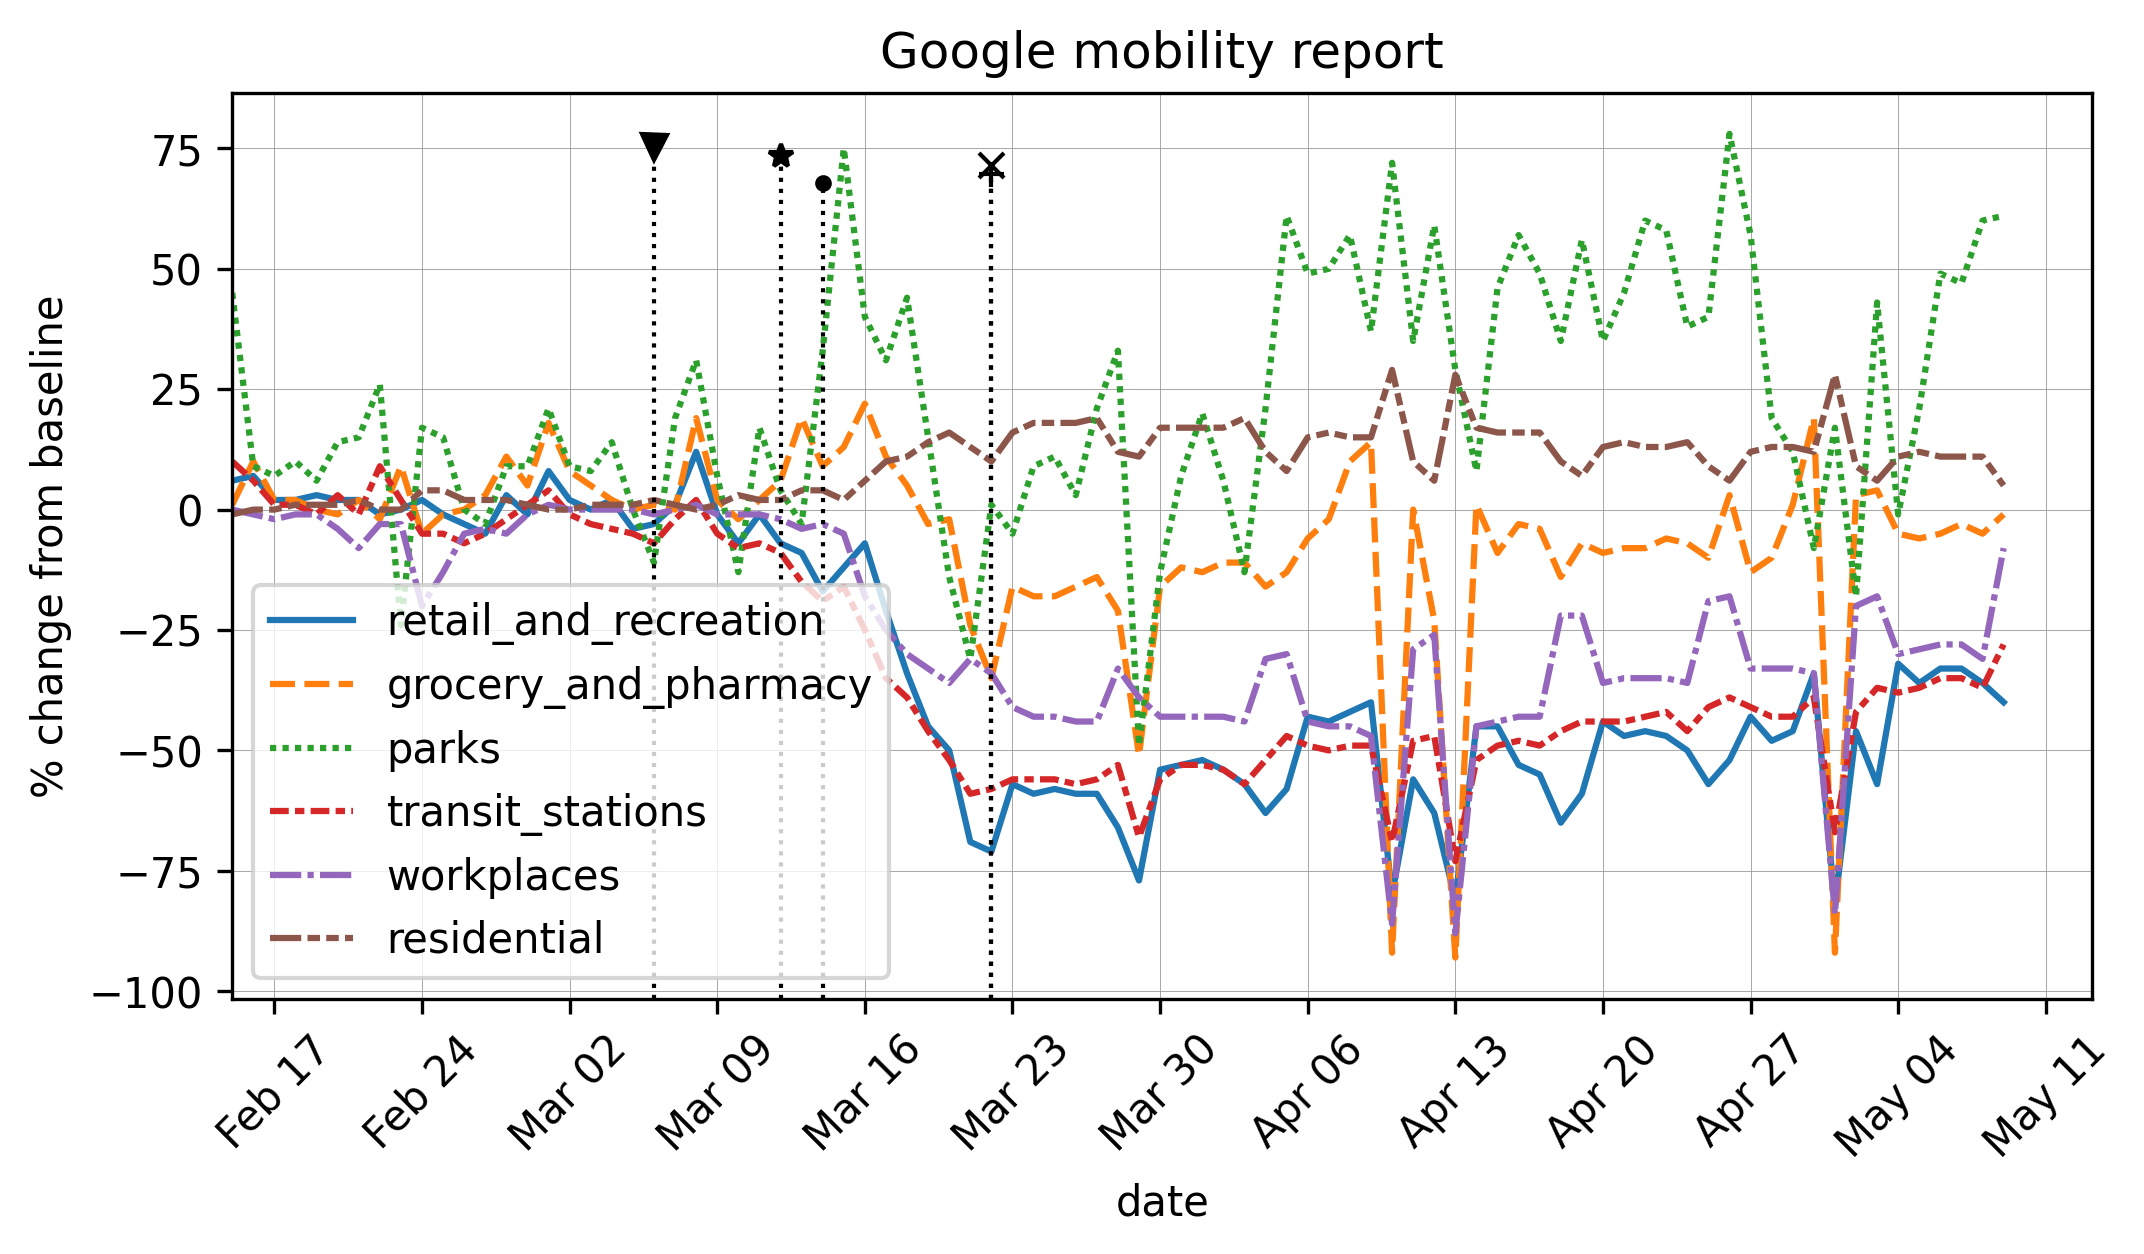

In [108]:
fig, ax = plt.subplots()
df = data.load_mobility(country, 'google')
sns.lineplot(
    data=df.rename(
        axis='columns',
        mapper={
            'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
            'parks_percent_change_from_baseline':'parks',
            'transit_stations_percent_change_from_baseline':'transit_stations',
            'workplaces_percent_change_from_baseline':'workplaces',
            'residential_percent_change_from_baseline':'residential'
        }

    ),
    ax=ax
)
ax.set_title('Google mobility report')
ax.set_ylabel('% change from baseline')
ax.grid(color='#999999', linewidth=0.2)
viz.annotate_interventions(ax,country,legend=False)
viz.format_xaxis_dates(ax)

ax.set_xlim(left=start_date)

(737470.0, 737559.2)

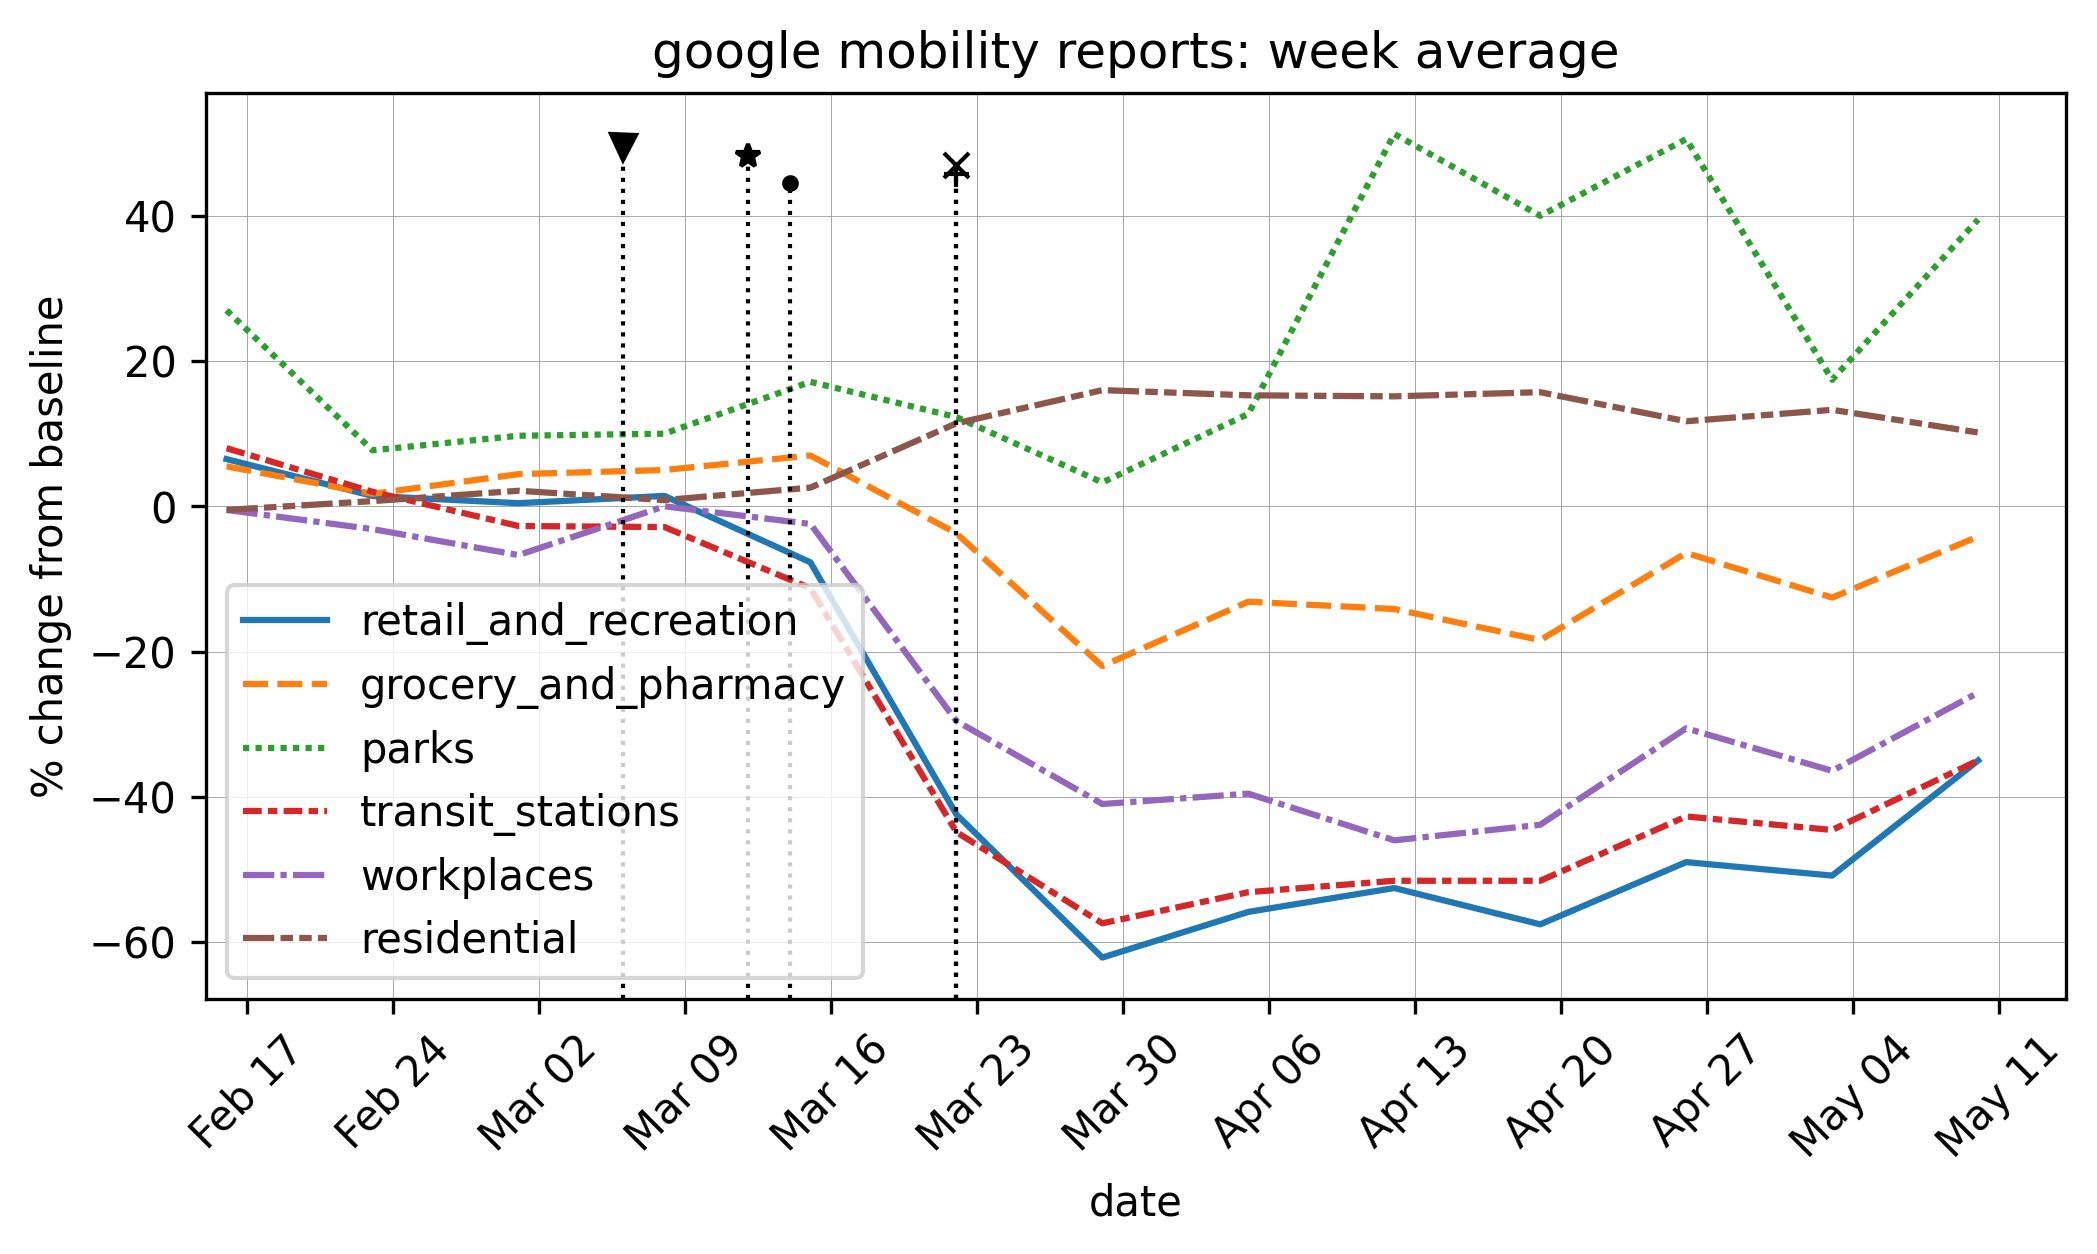

In [114]:
provider = 'google'
country = 'germany'

providers_countries = list(itertools.product(countries,providers))
nrows=len(providers_countries)
fig, ax = plt.subplots()


#for ax,(country,provider) in zip(axs,providers_countries):
df = data.load_mobility(country, provider).rename(
        axis='columns',
        mapper={
            'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
            'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
            'parks_percent_change_from_baseline':'parks',
            'transit_stations_percent_change_from_baseline':'transit_stations',
            'workplaces_percent_change_from_baseline':'workplaces',
            'residential_percent_change_from_baseline':'residential'
        }

    )
sns.lineplot(data=df.resample('W').mean(), ax=ax)
ax.set_title(f"{provider} mobility reports: week average")
ax.set_ylabel("% change from baseline")
ax.grid(color='#999999', linewidth=0.2)
viz.annotate_interventions(ax,country,legend=False)
viz.format_xaxis_dates(ax)

ax.set_xlim(left=start_date)

Text(0.5, 0, '')

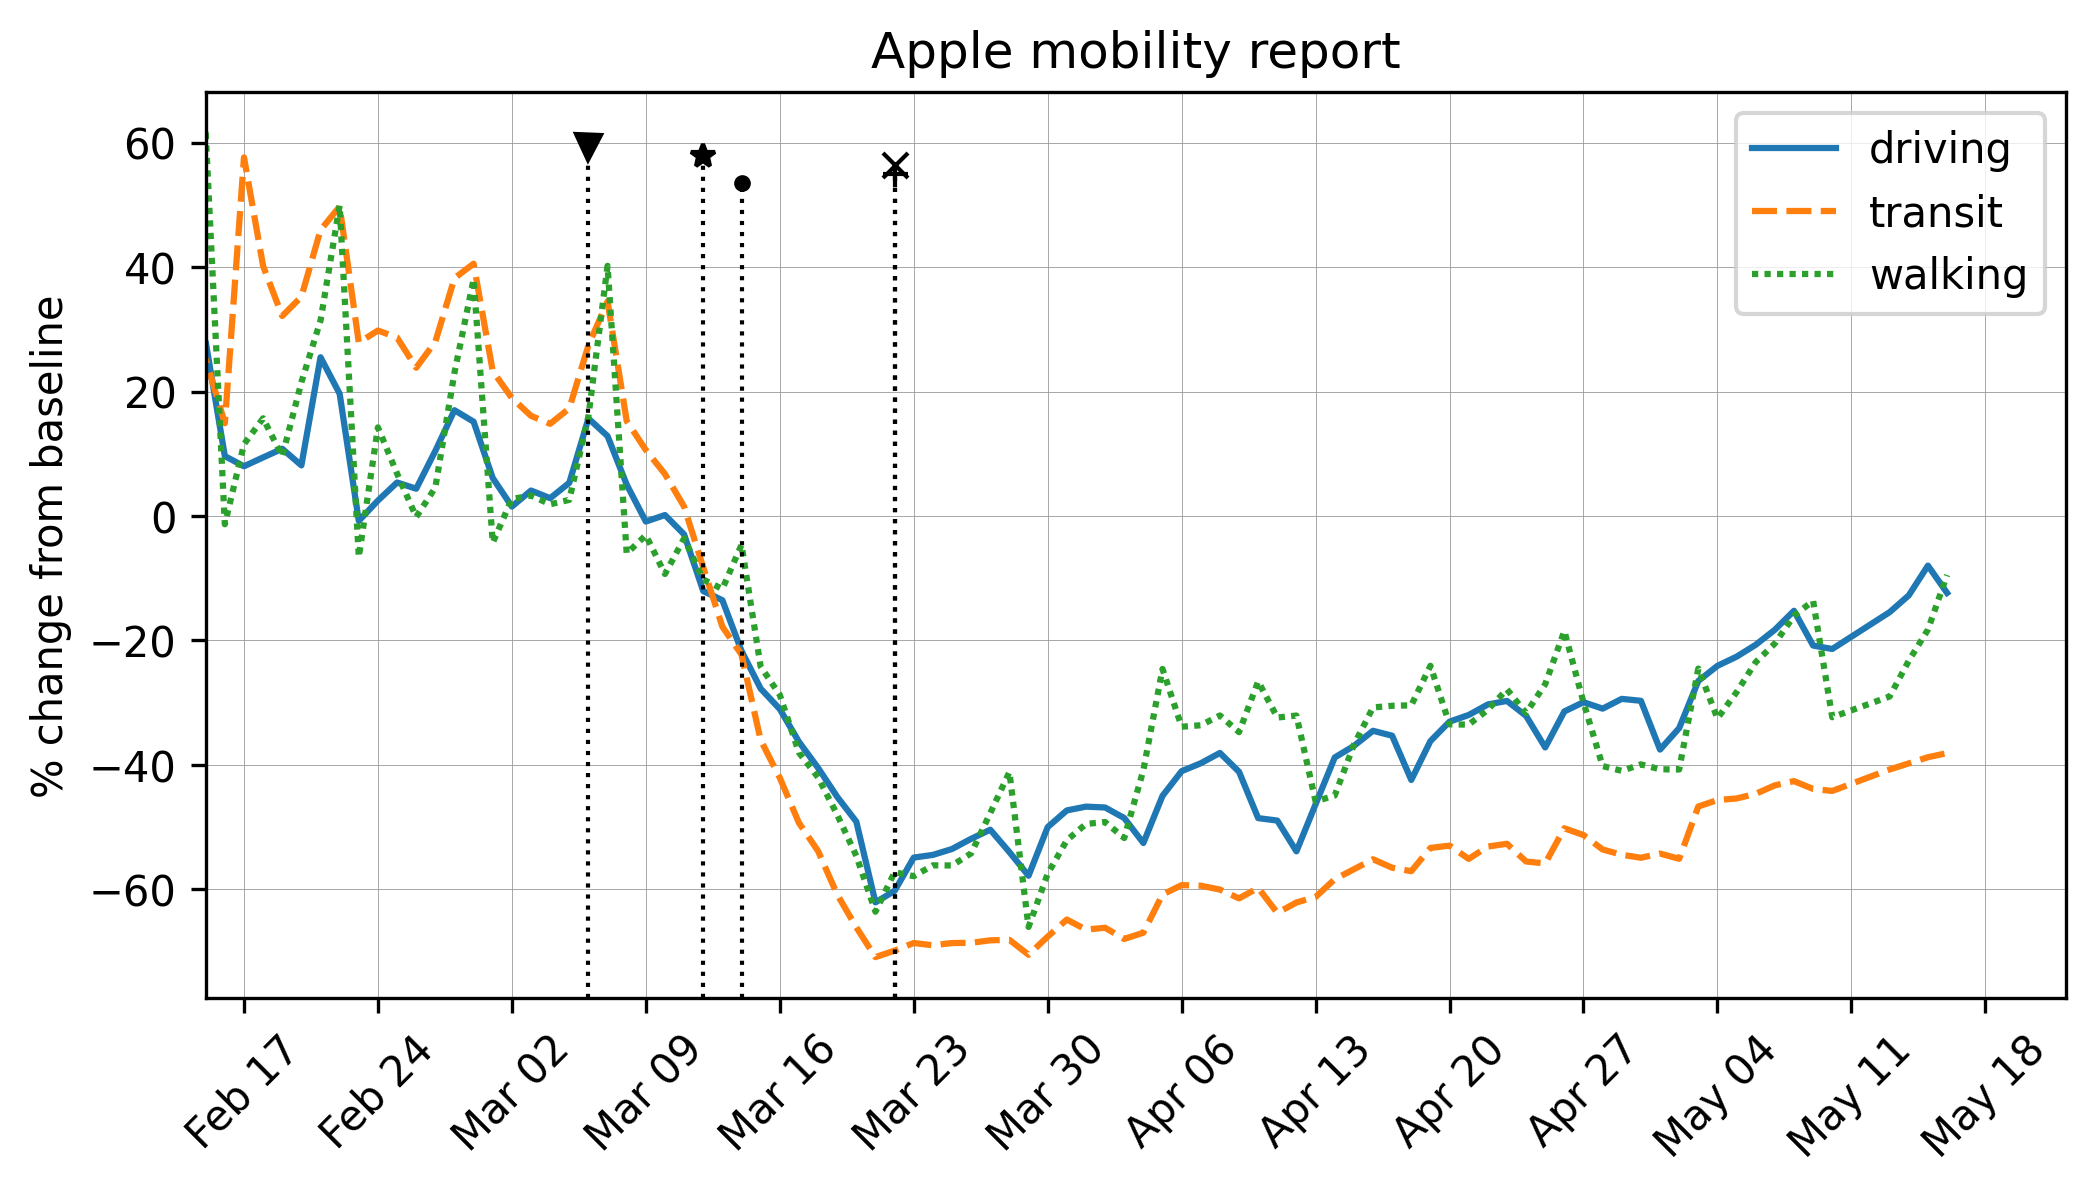

In [105]:
fig, ax = plt.subplots()
df = data.load_mobility(country, 'apple')
sns.lineplot(
    data=df-100,
    ax=ax
)
ax.set_title('Apple mobility report')
ax.set_ylabel('% change from baseline')
ax.grid(color='#999999', linewidth=0.2)
ax.set_xlim(left=start_date)

viz.annotate_interventions(ax,country,legend=False)
viz.format_xaxis_dates(ax)
ax.set_xlabel('')